#**HOMEWORK 2: REAL ESTATE PRICE PREDICTION (Total: / 25 points)**

# *Names: (Student One, Student Two)*

Make sure that you answer the conceptual questions provided at the front of the notebook (edit the XXX response sections to provide your answers). You probably want to answer these last, after you finish the hands-on portion of the assignment. 

#**Answers to Written Questions (5 points)**

**Question 1: XXX**

XXX

#**Setting Up Data Pipelines**

A great deal of the up-front code you can leave in place; you will simply need to modify the path structure in the file reading steps, to point the code at your Google Drive (wherever you unpack the dataset). 

This code reads in the 4 images and three numeric features for each home, creating separate tf.Dataset pipelines for each input type, in both training and validation. These dataset are then queried and combined in a generator, for each batch of homes, during training. 

##*Import the Numeric Features + Labels, Make TF Datasets*

In [43]:
import tensorflow as tf
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

batch_size = 5

drive.mount('/content/drive', force_remount=True)
cols = ['bedrooms','bathrooms','area','zipcode','price']

# We first pull out the train and validation data for numeric features.
homeFeatures_train = pd.read_csv('drive/MyDrive/Teaching/Courses/BA 865/Pre-Release/Week 5/datasets/Houses Dataset/train/HousesInfo.txt', sep=" ",header=None,names=cols)
homeFeatures_val = pd.read_csv('drive/MyDrive/Teaching/Courses/BA 865/Pre-Release/Week 5/datasets/Houses Dataset/validation/HousesInfo.txt', sep=" ",header=None,names=cols)

# Separate the labels for each sample.
labels_train = homeFeatures_train['price'].to_numpy()
labels_val = homeFeatures_val['price'].to_numpy()

# Dropping zipcodes, because we might never see the same zipcode again (or we might encounter a new one). There are other ways to deal with this, however...
homeFeatures_train = homeFeatures_train.loc[:,['bedrooms','bathrooms','area']].to_numpy()
homeFeatures_val = homeFeatures_val.loc[:,['bedrooms','bathrooms','area']].to_numpy()

# Next, make the associated numeric tf.Datasets for numeric features and labels.
house_features_train = tf.data.Dataset.from_tensor_slices(homeFeatures_train).batch(batch_size)
prices_train = tf.data.Dataset.from_tensor_slices(labels_train).batch(batch_size)

# This helps speed up the code, because it means that whenever the generator is called for 'next', we pre-fetch the next five observations.
house_features_train = house_features_train.prefetch(5)
price_train = prices_train.prefetch(5)

house_features_val = tf.data.Dataset.from_tensor_slices(homeFeatures_val).batch(batch_size)
prices_val = tf.data.Dataset.from_tensor_slices(labels_val).batch(batch_size)

house_features_val = house_features_val.prefetch(5)
prices_val = prices_val.prefetch(5)

Mounted at /content/drive


#*Create TF Image Datasets*

Found 435 files belonging to 1 classes.
Found 435 files belonging to 1 classes.
Found 435 files belonging to 1 classes.
Found 435 files belonging to 1 classes.
Found 100 files belonging to 1 classes.
Found 100 files belonging to 1 classes.
Found 100 files belonging to 1 classes.
Found 100 files belonging to 1 classes.


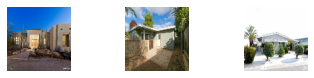

In [44]:
import os
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
import pandas as pd
import numpy as np
from functools import partial

# The image size we will compress our pictures to before feeding them into the network.
image_size = (100,100)

# Creating our tf.Datasets for train and test, for each type of training images (4 per house) 
# Replace the file path here to wherever you've stored the data on Google drive.
front_images_train = tf.keras.preprocessing.image_dataset_from_directory('drive/MyDrive/Teaching/Courses/BA 865/Pre-Release/Week 5/datasets/Houses Dataset/train/frontal/', 
                                                                   image_size=image_size,
                                                                   label_mode=None,
                                                                   batch_size = batch_size)

bathroom_images_train = tf.keras.preprocessing.image_dataset_from_directory('drive/MyDrive/Teaching/Courses/BA 865/Pre-Release/Week 5/datasets/Houses Dataset/train/bathroom', 
                                                                   image_size=image_size,
                                                                   label_mode=None,
                                                                   batch_size = batch_size)

bedroom_images_train = tf.keras.preprocessing.image_dataset_from_directory('drive/MyDrive/Teaching/Courses/BA 865/Pre-Release/Week 5/datasets/Houses Dataset/train/bedroom', 
                                                                   image_size=image_size,
                                                                   label_mode=None,
                                                                   batch_size = batch_size)

kitchen_images_train = tf.keras.preprocessing.image_dataset_from_directory('drive/MyDrive/Teaching/Courses/BA 865/Pre-Release/Week 5/datasets/Houses Dataset/train/kitchen', 
                                                                   image_size=image_size,
                                                                   label_mode=None,
                                                                   batch_size = batch_size)

# And, again for the validation data.
front_images_val = tf.keras.preprocessing.image_dataset_from_directory('drive/MyDrive/Teaching/Courses/BA 865/Pre-Release/Week 5/datasets/Houses Dataset/validation/frontal/', 
                                                                   image_size=image_size,
                                                                   label_mode=None,
                                                                   batch_size = batch_size)

bathroom_images_val = tf.keras.preprocessing.image_dataset_from_directory('drive/MyDrive/Teaching/Courses/BA 865/Pre-Release/Week 5/datasets/Houses Dataset/validation/bathroom', 
                                                                   image_size=image_size,
                                                                   label_mode=None,
                                                                   batch_size = batch_size)

bedroom_images_val = tf.keras.preprocessing.image_dataset_from_directory('drive/MyDrive/Teaching/Courses/BA 865/Pre-Release/Week 5/datasets/Houses Dataset/validation/bedroom', 
                                                                   image_size=image_size,
                                                                   label_mode=None,
                                                                   batch_size = batch_size)

kitchen_images_val = tf.keras.preprocessing.image_dataset_from_directory('drive/MyDrive/Teaching/Courses/BA 865/Pre-Release/Week 5/datasets/Houses Dataset/validation/kitchen', 
                                                                   image_size=image_size,
                                                                   label_mode=None,
                                                                   batch_size = batch_size)

# Pre-fetching 5 observations ahead, to speed up data processing at training time.
front_images_train = front_images_train.prefetch(5)
front_images_val = front_images_val.prefetch(5)

bathroom_images_train = bathroom_images_train.prefetch(5)
bathroom_images_val = bathroom_images_val.prefetch(5)

bedroom_images_train = bedroom_images_train.prefetch(5)
bedroom_images_val = bedroom_images_val.prefetch(5)

kitchen_images_train = kitchen_images_train.prefetch(5)
kitchen_images_val = kitchen_images_val.prefetch(5)

# Here are the first few 'frontal' images of the houses in our training dataset.
for images in front_images_train.take(1):
  for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

#*Generator functions to be passed to the model.fit() command at training*

Here, I am writing generator functions that can be passed into the model.fit() function at training time. This approach to model fitting is memory saving, because we only ever have one batch of data in memory at a time! I'm writing one generator to yield training data batches, and one to yield validation data batches.

In [45]:
def my_train_gen():

    # This generator function is going to yield a iterative object.
    # Each iteration from this generator will include a batch of 'batch_size' home observations.
    # Each batch will include a frontal, bathroom, bedroom, and kitchen image, three numeric home characteristics, and a numeric price label (one tuple per house).
    while True:

        # take(1) means take one of the batches, and make a new tf.Dataset from it. 
        # What this command does is iterate through the batches in each tf.Dataset we made earlier, and feeds their contents as iterable output from the generator.
        front_batch = []
        bath_batch = []
        bed_batch = []
        kitchen_batch = []

        for i in front_images_train.take(1):
            for j in range(i.shape[0]):
                front_batch.append(i[j].numpy().astype("int"))
        for i in bathroom_images_train.take(1):
            for j in range(i.shape[0]):
                bath_batch.append(i[j].numpy().astype("int"))
        for i in bedroom_images_train.take(1):
           for j in range(i.shape[0]):
                bed_batch.append(i[j].numpy().astype("int"))
        for i in kitchen_images_train.take(1):
            for j in range(i.shape[0]):
                kitchen_batch.append(i[j].numpy().astype("int"))
        for k in house_features_train.take(1):
            numeric_batch = k
        for l in prices_train.take(1):
            price_batch = l

        # The generator will pull the next batch of data for each image type, as well as the numeric content, and labels, convert them all to numpy arrays, and then return
        front_batch = np.stack(front_batch,axis=0)
        bath_batch = np.stack(bath_batch,axis=0)
        bed_batch = np.stack(bed_batch,axis=0)
        kitchen_batch = np.stack(kitchen_batch,axis=0)

        yield ((front_batch, bath_batch, bed_batch, kitchen_batch, numeric_batch),price_batch)

def my_val_gen():

    # This generator function is going to yield a iterative object.
    # Each iteration from this generator will include a batch of 'batch_size' home observations.
    # Each batch will include a frontal, bathroom, bedroom, and kitchen image, three numeric home characteristics, and a numeric price label (one tuple per house).
    while True:

        # take(1) means take one of the batches, and make a new tf.Dataset from it. 
        # What this command does is iterate through the batches in each tf.Dataset we made earlier, and feeds their contents as iterable output from the generator.
        front_batch = []
        bath_batch = []
        bed_batch = []
        kitchen_batch = []

        for i in front_images_val.take(1):
            for j in range(i.shape[0]):
                front_batch.append(i[j].numpy().astype("int"))
        for i in bathroom_images_val.take(1):
            for j in range(i.shape[0]):
                bath_batch.append(i[j].numpy().astype("int"))
        for i in bedroom_images_val.take(1):
           for j in range(i.shape[0]):
                bed_batch.append(i[j].numpy().astype("int"))
        for i in kitchen_images_val.take(1):
            for j in range(i.shape[0]):
                kitchen_batch.append(i[j].numpy().astype("int"))
        for k in house_features_val.take(1):
            numeric_batch = k
        for l in prices_val.take(1):
            price_batch = l

        # The generator will pull the next batch of data for each image type, as well as the numeric content, and labels, convert them all to numpy arrays, and then return
        front_batch = np.stack(front_batch,axis=0)
        bath_batch = np.stack(bath_batch,axis=0)
        bed_batch = np.stack(bed_batch,axis=0)
        kitchen_batch = np.stack(kitchen_batch,axis=0)

        yield ((front_batch, bath_batch, bed_batch, kitchen_batch, numeric_batch),price_batch)

#**Create Your Multi-Modal Neural Network Here (10 points)**

Provide your code here, to implement a multi-modal neural network. You should create 5 input branches (one for each image type, and a fifth for the numeric features). All of this needs to aggregate together to yield a single numeric prediction. Employ standard CNN block structures in your image branches (e.g., repetitions of Conv2D, BatchNormalization, Activation and then MaxPooling). Remember that we typically increase filter volume as we go deeper, whilst the dimensionality of the feature map diminishes (because of Max Pooling). 

Model: "model_29"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 frontal (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 bathroom (InputLayer)          [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 bedroom (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                         

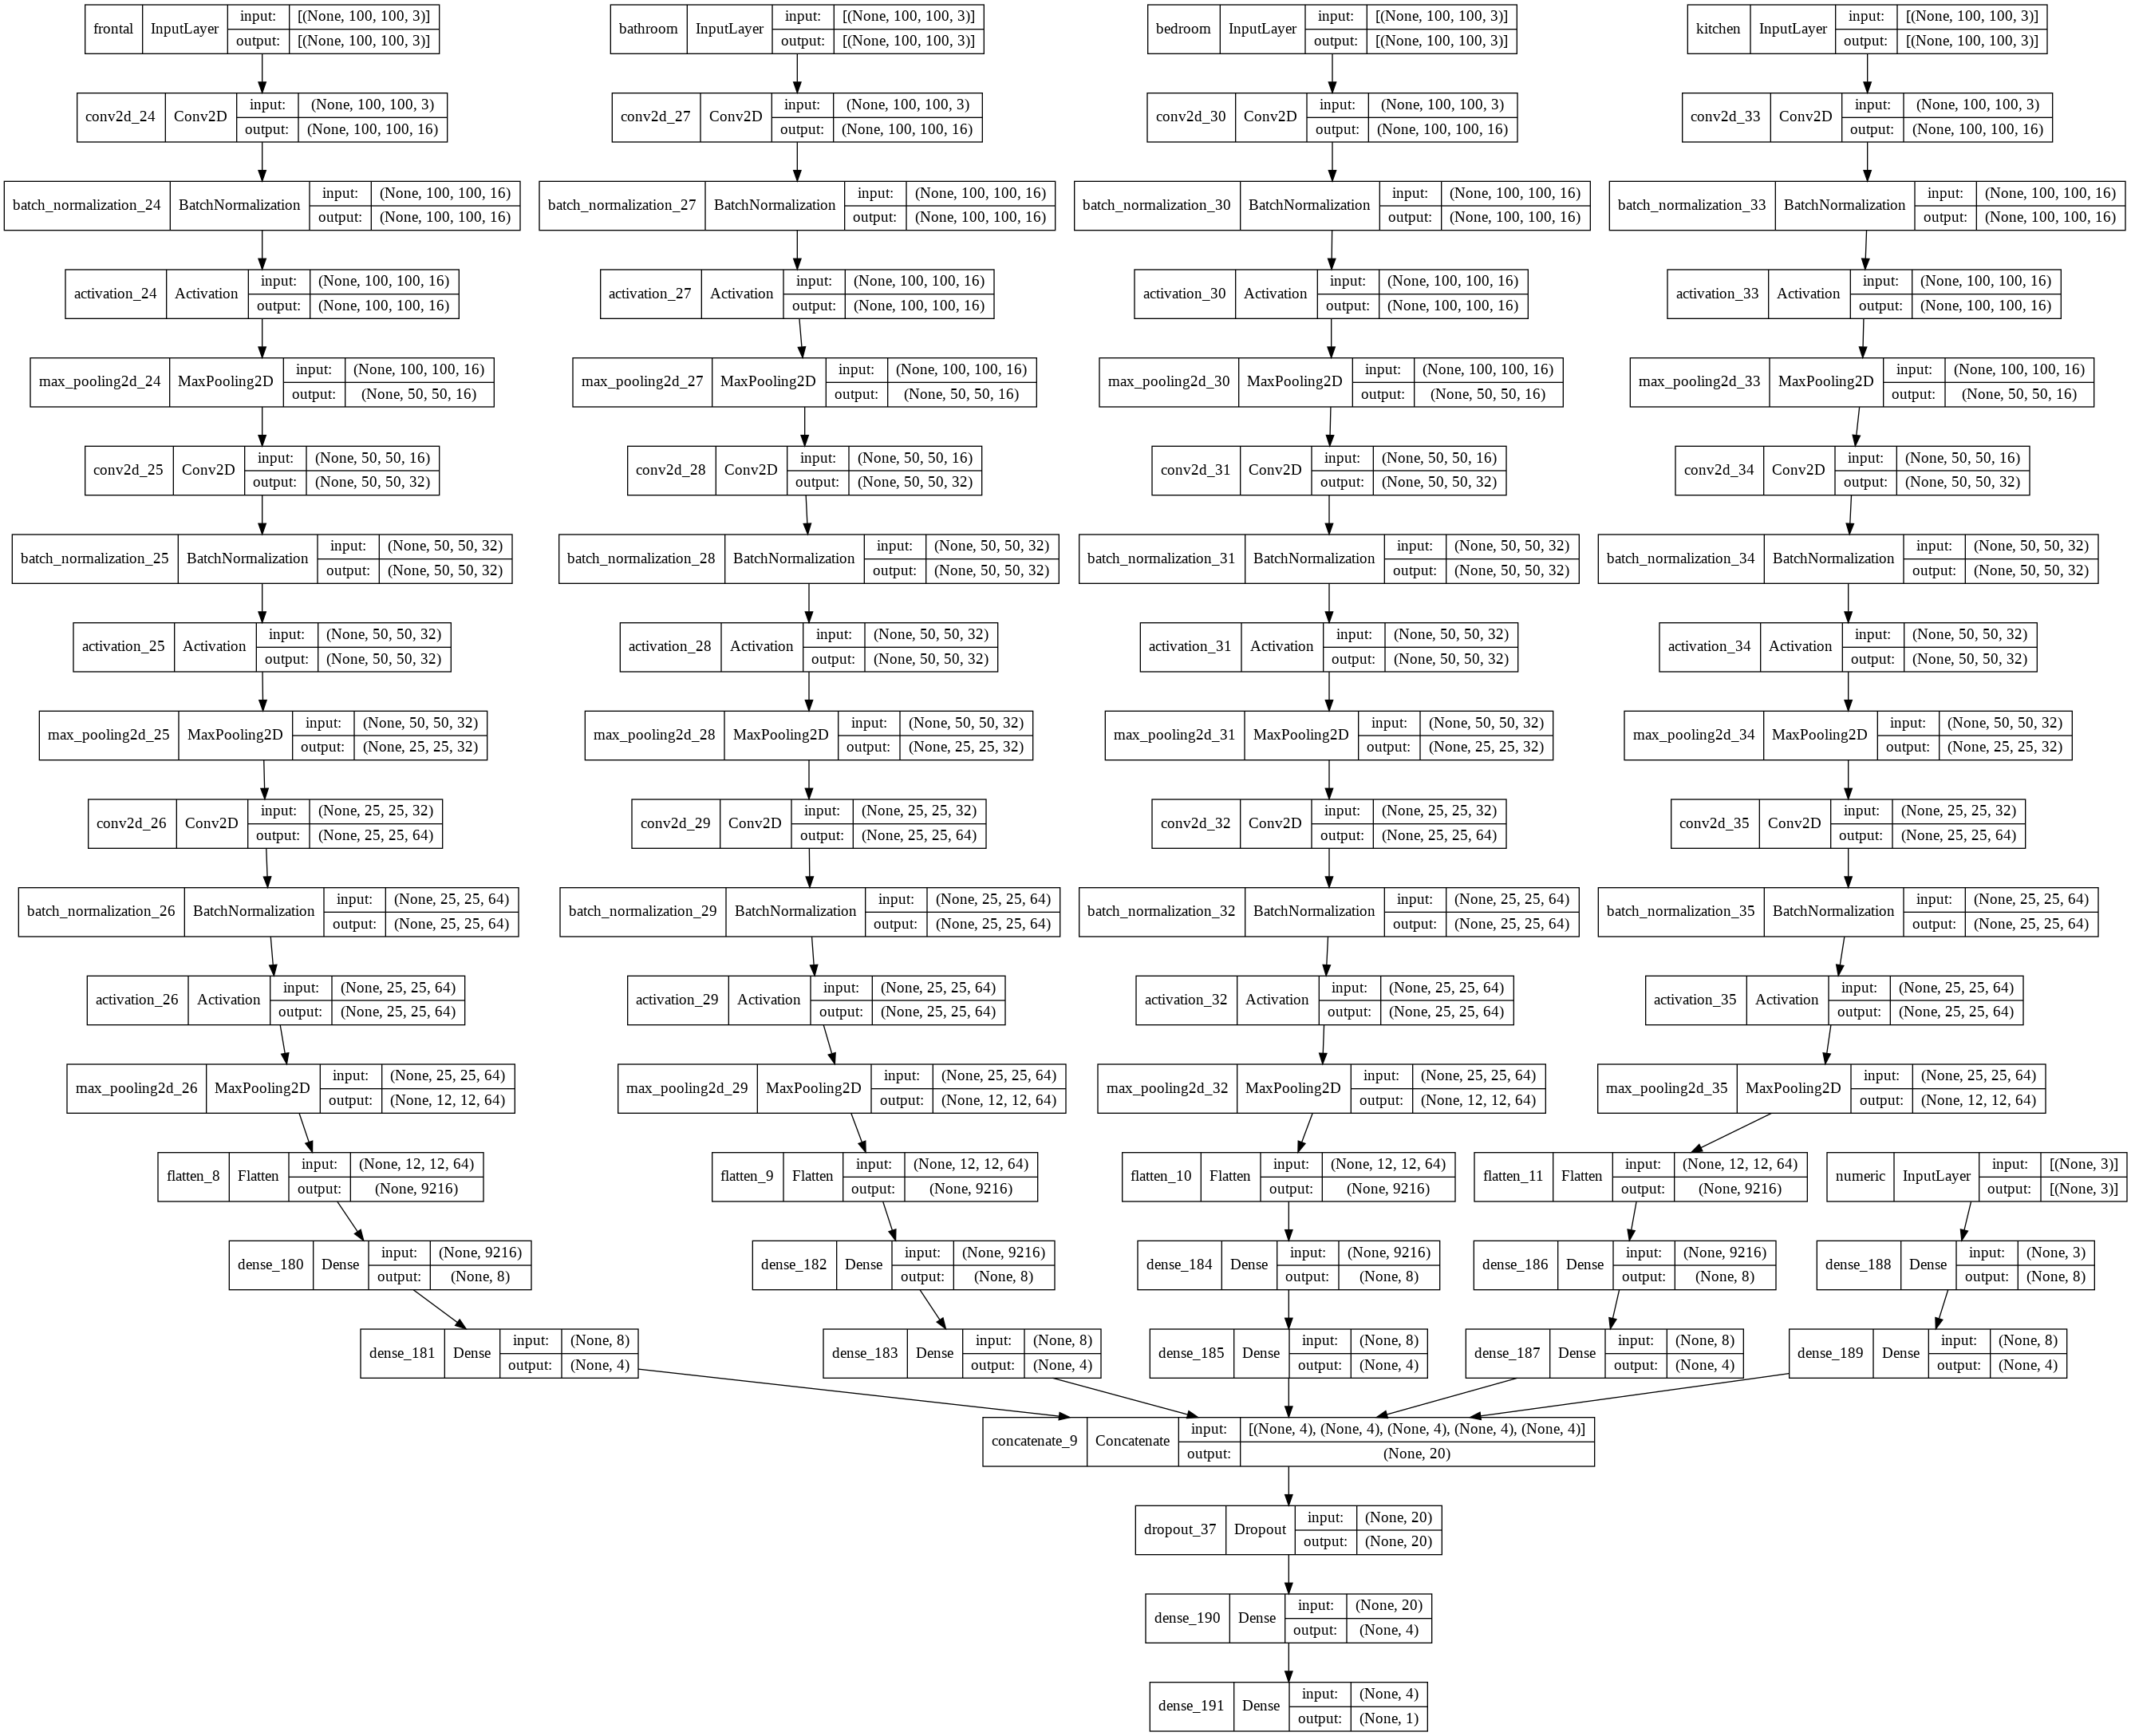

In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def create_mlp(name):

    inputs = layers.Input((3),name="numeric")
    x = layers.Dense(8, activation="relu")(inputs)
    outputs = layers.Dense(4, activation="relu")(x)
    
    model = keras.Model(inputs, outputs)
    
    return model

def create_cnn(name="generic"):

    inputs = layers.Input((image_size[0],image_size[1],3),name=name)
    x = layers.Conv2D(16, (3,3),padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D((2,2))(x) 
    x = layers.Conv2D(32,(3,3),padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Conv2D(64,(3,3),padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(8, activation="relu")(x)
    outputs = layers.Dense(4, activation="relu")(x)
    
    model = keras.Model(inputs, outputs)
    return model

frontal_model = create_cnn("frontal")
bathroom_model = create_cnn("bathroom")
bedroom_model = create_cnn("bedroom")
kitchen_model = create_cnn("kitchen")
numeric_model = create_mlp("numeric")

branch_merge = layers.concatenate([frontal_model.output, bathroom_model.output, bedroom_model.output, kitchen_model.output, numeric_model.output])

x = layers.Dropout(0.2)(branch_merge)
x = layers.Dense(4, activation="relu")(x)
final_output = layers.Dense(1, activation="linear")(x)

model = keras.Model(inputs=[frontal_model.input, bathroom_model.input, bedroom_model.input, kitchen_model.input,numeric_model.input], outputs=final_output)

model.compile(loss="mape", optimizer="adam")

model.summary()
keras.utils.plot_model(model, show_shapes=True)

#*Train Your Model Here*

Train your model and track validation loss in terms of MAPE. You probably won't need more than 20 epochs here, because overfitting can arise quickly!

In [49]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="multi_modal_from_scratch.keras",
        save_best_onlxy=True,
        monitor="val_loss")
]

num_epochs = 5

# We have 435 observations in training, 100 in validation, and a batch size of 5.
# Note, be very careful with setting the steps_per_epoch, and validation_steps parameters. These need to be integers, set correctly, or the training will hang.
history = model.fit(my_train_gen(), validation_data=my_val_gen(), epochs=num_epochs, steps_per_epoch=int(435/batch_size), validation_steps=int(100/batch_size), callbacks=callbacks)

Epoch 1/5
87/87 [==============================] - 74s 834ms/step - loss: 99.8825 - val_loss: 99.7424
Epoch 2/5
87/87 [==============================] - 69s 799ms/step - loss: 98.6006 - val_loss: 95.9531
Epoch 3/5
63/87 [====================>.........] - ETA: 19s - loss: 93.4045

KeyboardInterrupt: ignored

Plot model loss over epochs to undertand its performance.

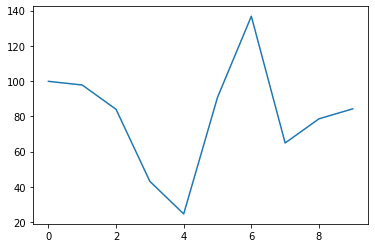

In [66]:
import matplotlib.pyplot as plt

# Fill this in.
plt.plot(history.history['val_loss'],c="b")
plt.plot(history.history['loss'],c="r")
plt.legend(['Validation Loss','Training Loss'])
plt.show()

#**Now, Try Using a Pre-Trained Model (10 points)**

In this section, you will replace the CNN components of your network with a pre-trained model. I am asking that you leverage VGG16 to pre-process your images into vectors, and then feed that vector output into a simple dense, fully-connected network to generate your predictions. Bear in mind that you will need to pre-process both the training and validation images!

#*Process Images Through VGG16's CNN Layers*

In [52]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False, # Throw away the densely connected layer at the end.
    input_shape=(image_size[0],image_size[1], 3)) # Optional - just for model.summary() call.

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_71 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

We are going to bring our TF.Datasets into memory now, because they are just going to be vectors after we push them through VGG's CNN layers. You need to write a quick function that loops over the images in each batch, and runs them through VGG16's CNN layers to get back the vectors.

In [53]:
def get_VGG_representations(dataset):
    all_batch_vector_reps = []
    for batch in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(batch)
        batch_vector_rep = conv_base.predict(preprocessed_images)
        all_batch_vector_reps.append(batch_vector_rep)
    return np.concatenate(all_batch_vector_reps)
  
front_images_train = get_VGG_representations(front_images_train)
front_images_val = get_VGG_representations(front_images_val)

bedroom_images_train =  get_VGG_representations(bedroom_images_train)
bedroom_images_val =  get_VGG_representations(bedroom_images_val)

bathroom_images_train =  get_VGG_representations(bathroom_images_train)
bathroom_images_val =  get_VGG_representations(bathroom_images_val)

kitchen_images_train =  get_VGG_representations(kitchen_images_train)
kitchen_images_val =  get_VGG_representations(kitchen_images_val)

# Recall we already created labels_train, labels_val and homeFeatures_train and homeFeatures_val, earlier, which are numpy arrays in memory.
homeFeatures_train.shape
labels_train.shape

(435,)

In [56]:
front_images_train.shape

(435, 3, 3, 512)

In [57]:
front_images_train = front_images_train.reshape(435,3*3*512)
front_images_val = front_images_val.reshape(100,3*3*512)
bedroom_images_train = bedroom_images_train.reshape(435,3*3*512)
bedroom_images_val = bedroom_images_val.reshape(100,3*3*512)
bathroom_images_train = bathroom_images_train.reshape(435,3*3*512)
bathroom_images_val = bathroom_images_val.reshape(100,3*3*512) 
kitchen_images_train = kitchen_images_train.reshape(435,3*3*512)
kitchen_images_val = kitchen_images_val.reshape(100,3*3*512)

#*Define Your Dense Network Here*

You will once again have a multi-branch network, but you've no longer any need for CNNs here. Just use a couple of Dense layers, merge the branches together and then produce a numeric prediction.

Model: "model_30"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_72 (InputLayer)          [(None, 4608)]       0           []                               
                                                                                                  
 input_74 (InputLayer)          [(None, 4608)]       0           []                               
                                                                                                  
 input_73 (InputLayer)          [(None, 4608)]       0           []                               
                                                                                                  
 input_75 (InputLayer)          [(None, 4608)]       0           []                               
                                                                                           

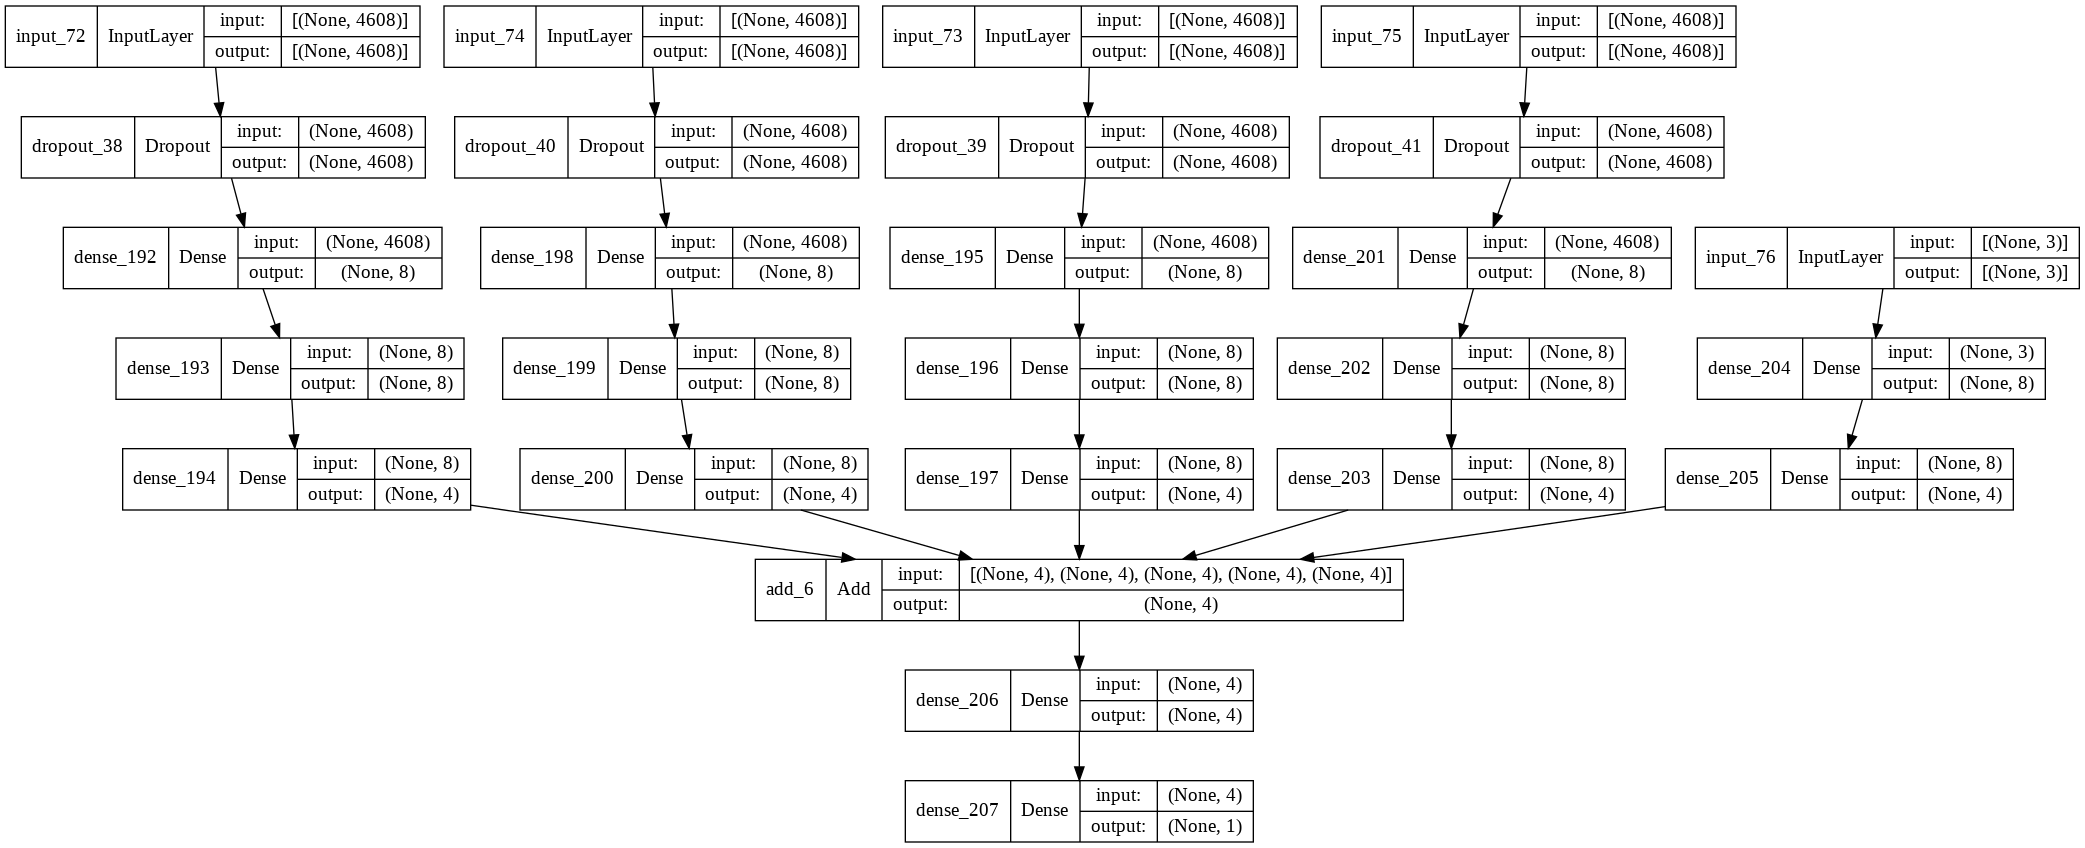

In [58]:
dropout_rate = 0.4

front_inputs = layers.Input(front_images_train.shape[1:])
x = layers.Dropout(dropout_rate)(front_inputs)
x = layers.Dense(8, activation="relu",kernel_regularizer="l2")(x)
x = layers.Dense(8, activation="relu",kernel_regularizer="l2")(x)
front_outputs = layers.Dense(4, activation="relu")(x)

bedroom_inputs = layers.Input(bedroom_images_train.shape[1:])
x = layers.Dropout(dropout_rate)(bedroom_inputs)
x = layers.Dense(8, activation="relu",kernel_regularizer="l2")(x)
x = layers.Dense(8, activation="relu",kernel_regularizer="l2")(x)
bedroom_outputs = layers.Dense(4, activation="relu")(x)

bathroom_inputs = layers.Input(bathroom_images_train.shape[1:])
x = layers.Dropout(dropout_rate)(bathroom_inputs)
x = layers.Dense(8, activation="relu",kernel_regularizer="l2")(x)
x = layers.Dense(8, activation="relu",kernel_regularizer="l2")(x)
bathroom_outputs = layers.Dense(4, activation="relu")(x)

kitchen_inputs = layers.Input(kitchen_images_train.shape[1:])
x = layers.Dropout(dropout_rate)(kitchen_inputs)
x = layers.Dense(8, activation="relu",kernel_regularizer="l2")(x)
x = layers.Dense(8, activation="relu",kernel_regularizer="l2")(x)
kitchen_outputs = layers.Dense(4, activation="relu")(x)

numeric_inputs = layers.Input(homeFeatures_train.shape[1:])
x = layers.Dense(8, activation="relu")(numeric_inputs)
numeric_outputs = layers.Dense(4, activation="relu")(x)

branch_merge = layers.Add()([front_outputs, bathroom_outputs, bedroom_outputs, kitchen_outputs, numeric_outputs])

x = layers.Dense(4, activation="relu",kernel_regularizer="l2")(branch_merge)
final_output = layers.Dense(1)(x)

model = keras.Model(inputs=[front_inputs, bathroom_inputs, bedroom_inputs, kitchen_inputs,numeric_inputs], outputs=final_output)

model.compile(loss="mape", optimizer="adam")

model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [59]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="multi_modal_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]

num_epochs = 75

history = model.fit([front_images_train,bedroom_images_train,bathroom_images_train,kitchen_images_train,homeFeatures_train], y=labels_train, epochs=num_epochs, validation_split=0.2, callbacks=callbacks)

Epoch 1/75
11/11 [==============================] - 2s 41ms/step - loss: 100.7028 - val_loss: 100.3274
Epoch 2/75
10/11 [==========================>...] - ETA: 0s - loss: 100.3671

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


11/11 [==============================] - 0s 18ms/step - loss: 100.3590 - val_loss: 99.9901
Epoch 3/75
11/11 [==============================] - 0s 18ms/step - loss: 100.1920 - val_loss: 99.7490
Epoch 4/75
11/11 [==============================] - 0s 17ms/step - loss: 100.1006 - val_loss: 99.5072
Epoch 5/75
11/11 [==============================] - 0s 17ms/step - loss: 100.0172 - val_loss: 99.2316
Epoch 6/75
11/11 [==============================] - 0s 19ms/step - loss: 99.9254 - val_loss: 98.8554
Epoch 7/75
11/11 [==============================] - 0s 18ms/step - loss: 99.8077 - val_loss: 98.3379
Epoch 8/75
11/11 [==============================] - 0s 18ms/step - loss: 99.6462 - val_loss: 97.6688
Epoch 9/75
11/11 [==============================] - 0s 17ms/step - loss: 99.4482 - val_loss: 96.7271
Epoch 10/75
11/11 [==============================] - 0s 17ms/step - loss: 99.1642 - val_loss: 95.5110
Epoch 11/75
11/11 [==============================] - 0s 19ms/step - loss: 98.7973 - val_loss: 93.